# Feature Importance Table

## Refer ORIGNINAL last Copy is 16 May Before editing 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('CleavelandHeartUCI.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data=dataset

In [7]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Using Tree for reference of RF Classifiers

In [8]:
## For Tree Classifiers
X = data.iloc[:,0:13] #independent columns
y = data.iloc[:,-1] #target column

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree

[0.07225318 0.04719219 0.10394242 0.05850955 0.06094307 0.02141589
 0.03456787 0.08365964 0.08161972 0.07922793 0.05668128 0.13373126
 0.16625601]


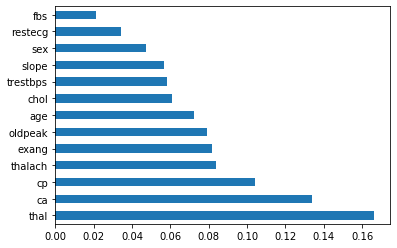

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

## Using  RF  Feature Importance

In [11]:
##For Random Forest Feature Importance
X1 = data.iloc[:,0:13] #independent columns
y1 = data.iloc[:,-1] #target column

RandomForestClassifier(random_state=1)
Feature: 0, Score: 0.15318
Feature: 1, Score: 0.09574
Feature: 2, Score: 0.04196
Feature: 3, Score: 0.07399
Feature: 4, Score: 0.07800
Feature: 5, Score: 0.04723
Feature: 6, Score: 0.01951
Feature: 7, Score: 0.11221
Feature: 8, Score: 0.02103
Feature: 9, Score: 0.10643
Feature: 10, Score: 0.02195
Feature: 11, Score: 0.16274
Feature: 12, Score: 0.06603


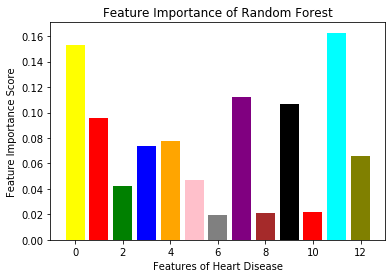

In [12]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=13, n_informative=5,n_redundant=5,random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
print(model)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance ,color=['yellow', 'red', 'green', 'blue', 'orange','pink', 'gray', 'purple', 'brown', 'black',"red",'cyan','olive'])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Features of Heart Disease")
plt.ylabel("Feature Importance Score")
pyplot.show()

In [13]:
importance

array([0.1531759 , 0.09573983, 0.04196414, 0.07398781, 0.07800084,
       0.04722719, 0.01950508, 0.11220764, 0.02103406, 0.10643415,
       0.02195392, 0.16274363, 0.06602581])

In [14]:
df1 = pd.DataFrame(importance)

In [15]:
df1.to_csv("RF_FeatureImportance.csv")

## Using  XGBoost  Feature Importance

In [16]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot


In [17]:
## conda install -c anaconda py-xgboost If needed

In [18]:
##For XGBOOST Feature Importance
Xg = data.iloc[:,0:13] #independent columns
yg = data.iloc[:,-1] #target column

In [19]:
from xgboost import XGBClassifier

Feature: 0, Score: 0.10743
Feature: 1, Score: 0.08562
Feature: 2, Score: 0.02134
Feature: 3, Score: 0.13857
Feature: 4, Score: 0.09662
Feature: 5, Score: 0.05003
Feature: 6, Score: 0.01948
Feature: 7, Score: 0.06002
Feature: 8, Score: 0.02472
Feature: 9, Score: 0.09950
Feature: 10, Score: 0.01449
Feature: 11, Score: 0.25556
Feature: 12, Score: 0.02663


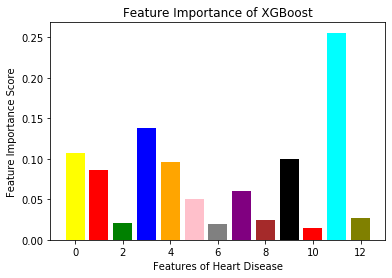

In [20]:
# define dataset
Xg, yg = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
import random
random.seed(100)
model = XGBClassifier()
# fit the model
model.fit(Xg, yg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color=['yellow', 'red', 'green', 'blue', 'orange','pink', 'gray', 'purple', 'brown', 'black',"red",'cyan','olive'])
plt.title("Feature Importance of XGBoost")
plt.xlabel("Features of Heart Disease")
plt.ylabel("Feature Importance Score")
pyplot.show()

In [21]:
importance

array([0.10743108, 0.08562016, 0.02133949, 0.13857208, 0.09661745,
       0.05003397, 0.0194775 , 0.06001623, 0.02471733, 0.09949738,
       0.01448703, 0.25556368, 0.0266266 ], dtype=float32)

In [22]:
df2 = pd.DataFrame(importance)

In [23]:
df2.to_csv("XGBoost_FeatureImportance.csv")

## Using  LR  Feature Importance

In [24]:
##For LR Feature Importance
XL = data.iloc[:,0:13] #independent columns
yL = data.iloc[:,-1] #target column

Feature: 0, Score: 0.49351
Feature: 1, Score: -0.41169
Feature: 2, Score: 0.27253
Feature: 3, Score: 0.18284
Feature: 4, Score: -0.52518
Feature: 5, Score: 0.04419
Feature: 6, Score: 0.06553
Feature: 7, Score: -0.64818
Feature: 8, Score: -0.01596
Feature: 9, Score: -0.11633
Feature: 10, Score: 0.09287
Feature: 11, Score: -0.46256
Feature: 12, Score: 0.16161


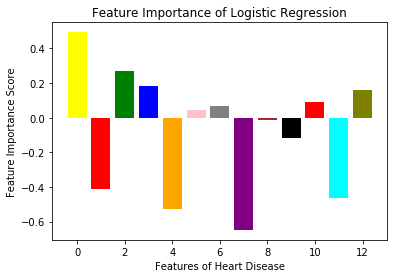

In [25]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import random
random.seed(100)
from matplotlib import pyplot
# define dataset
XL, yL = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(XL, yL)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color=['yellow', 'red', 'green', 'blue', 'orange','pink', 'gray', 'purple', 'brown', 'black',"red",'cyan','olive'])
plt.title("Feature Importance of Logistic Regression")
plt.xlabel("Features of Heart Disease")
plt.ylabel("Feature Importance Score")
pyplot.show()

In [26]:
importance

array([ 0.49351329, -0.41168907,  0.27252625,  0.18283556, -0.52517658,
        0.0441901 ,  0.06553438, -0.64818295, -0.01596162, -0.11633493,
        0.09286643, -0.46255815,  0.16161349])

In [27]:
df3 = pd.DataFrame(importance)

In [28]:
df3.to_csv("LR_FeatureImportance.csv")

## Using  KNN   Feature Importance

In [29]:
##For KNN Feature Importance
Xkn = data.iloc[:,0:13] #independent columns
ykn = data.iloc[:,-1] #target column

Feature: 0, Score: 0.00580
Feature: 1, Score: 0.00520
Feature: 2, Score: 0.07760
Feature: 3, Score: 0.04700
Feature: 4, Score: 0.01120
Feature: 5, Score: 0.05140
Feature: 6, Score: 0.09320
Feature: 7, Score: 0.09920
Feature: 8, Score: 0.08020
Feature: 9, Score: 0.01660
Feature: 10, Score: 0.05080
Feature: 11, Score: 0.01580
Feature: 12, Score: 0.00480


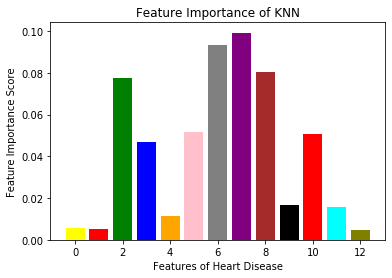

In [30]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
Xkn, ykn = make_classification(n_samples=1000, n_features=13, n_informative=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
import random
random.seed(100)
model.fit(Xkn, ykn)
# perform permutation importance
results = permutation_importance(model, Xkn, ykn, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance,color=['yellow', 'red', 'green', 'blue', 'orange','pink', 'gray', 'purple', 'brown', 'black',"red",'cyan','olive'])
plt.title("Feature Importance of KNN")
plt.xlabel("Features of Heart Disease")
plt.ylabel("Feature Importance Score")
pyplot.show()

In [31]:
importance

array([0.0058, 0.0052, 0.0776, 0.047 , 0.0112, 0.0514, 0.0932, 0.0992,
       0.0802, 0.0166, 0.0508, 0.0158, 0.0048])

In [32]:
df4 = pd.DataFrame(importance)

In [33]:
df4.to_csv("KNN_FeatureImportance.csv")

## Using  SVM   Feature Importance

In [34]:
##For SVM Feature Importance
Xs = data.iloc[:,0:13] #independent columns
ys = data.iloc[:,-1] #target column

## Part Draft Linear Kernel

In [36]:
##For SVM Feature Importance
Xvm = data.iloc[:,0:13] #independent columns
yvm = data.iloc[:,-1] #target column

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


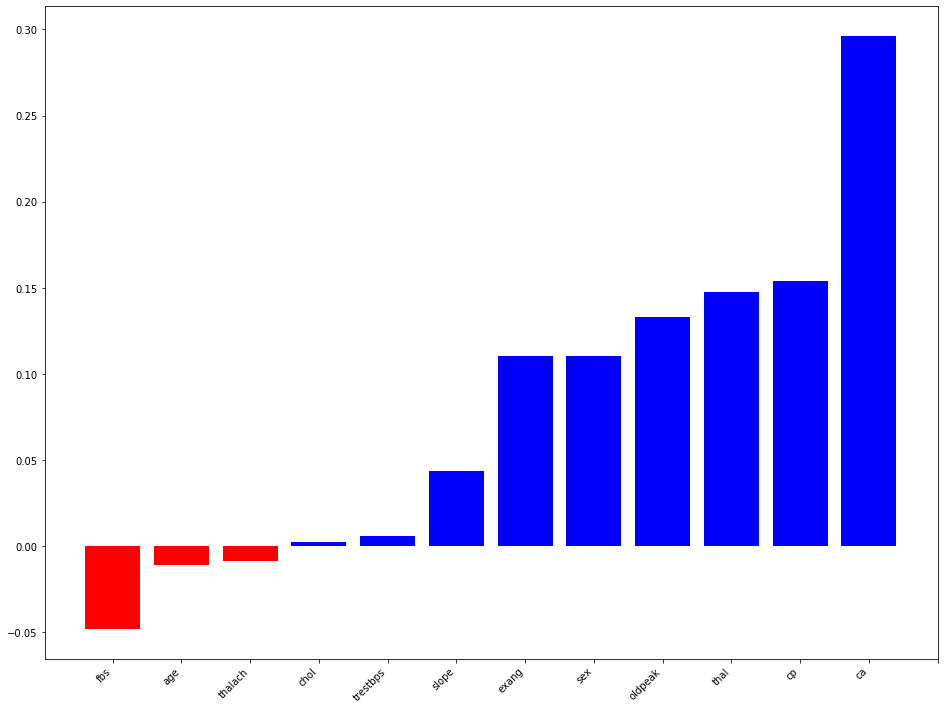

In [37]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=6):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(16, 12))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()
    

print(data.drop(['target'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC().fit(Xvm, yvm)
feature_plot(trainedsvm, data.drop(['target'], axis = 1).columns.values)

In [38]:
trainedsvm

LinearSVC()

## For SVM Feature Importance

In [39]:
Xv = data.iloc[:,0:13] #independent columns
yv = data.iloc[:,-1] #target column

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [41]:
import random
random.seed(100)
from sklearn.model_selection import train_test_split
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size = 0.20, random_state = 0)

Xv_train=std_scaler.fit_transform(Xv_train)
Xv_test=std_scaler.transform(Xv_test)

In [42]:
import random
random.seed(100)
from sklearn import svm
from sklearn.svm import SVC
svc = SVC()

In [43]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.inspection import permutation_importance

import random
random.seed(100)
svc = SVC(kernel='rbf', C=2)
svc.fit(Xv_train, yv_train)

perm_importance = permutation_importance(svc, Xv_test, yv_test)

Text(0, 0.5, 'Feature Importance Score')

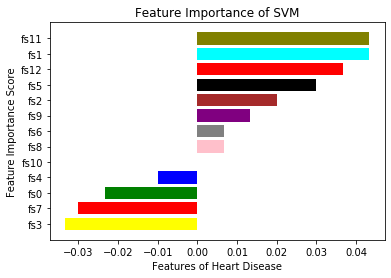

In [44]:
import random
random.seed(100)
feature_names = ["fs0","fs1","fs2","fs3","fs4","fs5","fs6","fs7","fs8","fs9","fs10","fs11","fs12"]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx],color=['yellow', 'red', 'green', 'blue', 'orange','pink', 'gray', 'purple', 'brown', 'black',"red",'cyan','olive'])
plt.title("Feature Importance of SVM")
plt.xlabel("Features of Heart Disease")
plt.ylabel("Feature Importance Score")


In [45]:
features 

array(['fs0', 'fs1', 'fs2', 'fs3', 'fs4', 'fs5', 'fs6', 'fs7', 'fs8',
       'fs9', 'fs10', 'fs11', 'fs12'], dtype='<U4')

In [46]:
sorted_idx

array([ 3,  7,  0,  4, 10,  8,  6,  9,  2,  5, 12,  1, 11], dtype=int64)

In [47]:
perm_importance

{'importances_mean': array([-2.33333333e-02,  4.33333333e-02,  2.00000000e-02, -3.33333333e-02,
        -1.00000000e-02,  3.00000000e-02,  6.66666667e-03, -3.00000000e-02,
         6.66666667e-03,  1.33333333e-02, -2.22044605e-17,  4.33333333e-02,
         3.66666667e-02]),
 'importances_std': array([0.00816497, 0.01699673, 0.0244949 , 0.01490712, 0.01333333,
        0.00666667, 0.00816497, 0.01943651, 0.01333333, 0.03559026,
        0.01054093, 0.03091206, 0.02867442]),
 'importances': array([[-0.01666667, -0.01666667, -0.01666667, -0.03333333, -0.03333333],
        [ 0.05      ,  0.05      ,  0.03333333,  0.06666667,  0.01666667],
        [ 0.        ,  0.01666667,  0.06666667,  0.        ,  0.01666667],
        [-0.01666667, -0.05      , -0.05      , -0.03333333, -0.01666667],
        [-0.03333333,  0.        , -0.01666667,  0.        ,  0.        ],
        [ 0.03333333,  0.03333333,  0.01666667,  0.03333333,  0.03333333],
        [ 0.        ,  0.        ,  0.01666667,  0.        

In [48]:
perm_importance

{'importances_mean': array([-2.33333333e-02,  4.33333333e-02,  2.00000000e-02, -3.33333333e-02,
        -1.00000000e-02,  3.00000000e-02,  6.66666667e-03, -3.00000000e-02,
         6.66666667e-03,  1.33333333e-02, -2.22044605e-17,  4.33333333e-02,
         3.66666667e-02]),
 'importances_std': array([0.00816497, 0.01699673, 0.0244949 , 0.01490712, 0.01333333,
        0.00666667, 0.00816497, 0.01943651, 0.01333333, 0.03559026,
        0.01054093, 0.03091206, 0.02867442]),
 'importances': array([[-0.01666667, -0.01666667, -0.01666667, -0.03333333, -0.03333333],
        [ 0.05      ,  0.05      ,  0.03333333,  0.06666667,  0.01666667],
        [ 0.        ,  0.01666667,  0.06666667,  0.        ,  0.01666667],
        [-0.01666667, -0.05      , -0.05      , -0.03333333, -0.01666667],
        [-0.03333333,  0.        , -0.01666667,  0.        ,  0.        ],
        [ 0.03333333,  0.03333333,  0.01666667,  0.03333333,  0.03333333],
        [ 0.        ,  0.        ,  0.01666667,  0.        

In [49]:
perm_importance

{'importances_mean': array([-2.33333333e-02,  4.33333333e-02,  2.00000000e-02, -3.33333333e-02,
        -1.00000000e-02,  3.00000000e-02,  6.66666667e-03, -3.00000000e-02,
         6.66666667e-03,  1.33333333e-02, -2.22044605e-17,  4.33333333e-02,
         3.66666667e-02]),
 'importances_std': array([0.00816497, 0.01699673, 0.0244949 , 0.01490712, 0.01333333,
        0.00666667, 0.00816497, 0.01943651, 0.01333333, 0.03559026,
        0.01054093, 0.03091206, 0.02867442]),
 'importances': array([[-0.01666667, -0.01666667, -0.01666667, -0.03333333, -0.03333333],
        [ 0.05      ,  0.05      ,  0.03333333,  0.06666667,  0.01666667],
        [ 0.        ,  0.01666667,  0.06666667,  0.        ,  0.01666667],
        [-0.01666667, -0.05      , -0.05      , -0.03333333, -0.01666667],
        [-0.03333333,  0.        , -0.01666667,  0.        ,  0.        ],
        [ 0.03333333,  0.03333333,  0.01666667,  0.03333333,  0.03333333],
        [ 0.        ,  0.        ,  0.01666667,  0.        

In [50]:
perm_importance.importances_mean[sorted_idx]

array([-3.33333333e-02, -3.00000000e-02, -2.33333333e-02, -1.00000000e-02,
       -2.22044605e-17,  6.66666667e-03,  6.66666667e-03,  1.33333333e-02,
        2.00000000e-02,  3.00000000e-02,  3.66666667e-02,  4.33333333e-02,
        4.33333333e-02])

In [51]:
df5 = pd.DataFrame(perm_importance.importances_mean[sorted_idx])

In [52]:
## Scores for SVM using permuttation feature importance scores



df5

,0
0,-3.333333e-02
1,-3.000000e-02
2,-2.333333e-02
3,-1.000000e-02
4,-2.220446e-17
5,6.666667e-03
6,6.666667e-03
7,1.333333e-02
8,2.000000e-02
9,3.000000e-02


In [53]:
df5.to_csv("SVM_RBF_FeatureImportance.csv")